### Overdose data

In [2]:
import pandas as pd

In [23]:
import geopandas as gpd

In [9]:
overdose = pd.read_csv('data/raw/overdose_data_2021.csv', dtype = {'death_zip_code': str , 'event_zip': str})

In [10]:
overdose.columns = overdose.columns.str.lower().str.replace(' ', '_', regex = False)

In [11]:
overdose['race'] = overdose['race'].str.title()

In [12]:
overdose.head()

,case_number,age,gender,race,date_of_death,deathplace,death_address,deathcity,death_zip_code,event_place,event_address,eventcity,event_zip,mode,cause_a,cause_b,cause_c,cause_d
0,2021-03798,59.0,Male,Hispanic/Latin American,3/7/2021,ABANDONED BUILDING,1433 PLAYGROUND STREET,LOS ANGELES,90033,ABANDONED BUILDING,1433 PLAYGROUND STREET,LOS ANGELES,90033.0,ACCIDENT,EFFECTS OF FENTANYL AND METHAMPHETAMINE,NaN,NaN,NaN
1,2021-04526,26.0,Male,Black,3/28/2021,ABANDONED BUILDING,743 WEST AVENUE I,LANCASTER,93534,UNKNOWN,NaN,NaN,NaN,ACCIDENT,EFFECTS OF FENTANYL AND METHEMPHETAMINE,NaN,NaN,NaN
2,2021-07819,30.0,Male,Black,7/4/2021,ABANDONED BUILDING,1888 S. MAIN STREET,LOS ANGELES,90012,ABANDONED BUILDING,1888 S. MAIN STREET,LOS ANGELES,90012.0,ACCIDENT,COMBINED EFFECTS OF FENTANYL AND METHAMPHETAMINE,NaN,NaN,NaN
3,2021-08268,34.0,Male,Black,7/16/2021,ABANDONED BUILDING,1337 ORANGE DRIVE,LOS ANGELES,90028,ABANDONED BACK HOUSE,1337 ORANGE DRIVE,LOS ANGELES,90028.0,ACCIDENT,EFFECTS OF FENTANYL AND METHAMPHETAMINE,NaN,NaN,NaN
4,2021-11490,52.0,Male,Black,10/15/2021,ABANDONED BUILDING,E. VERNON AVENUE & METTLER AVENUE,LOS ANGELES,90011,UNKNOWN,NaN,NaN,NaN,ACCIDENT,cocaine and methamphetamine toxicity,NaN,NaN,NaN


In [19]:
deaths_by_zip = overdose.groupby('death_zip_code').agg({'case_number': 'count'}).reset_index().sort_values('case_number', ascending = False).rename(columns = {'case_number': 'count'})

In [41]:
deaths_by_zip['death_zip_code'] = deaths_by_zip['death_zip_code'].astype(str)

---

### Import geography

In [42]:
la_zips = gpd.read_file('../../data/geo/la_county_zips_tesla_rate.geojson', dtype = {'zip': str})

In [43]:
la_zips['zip'] = la_zips['zip'].astype(str)

In [44]:
la_zips = la_zips[['zip', 'geometry']]

In [45]:
la_zips.dtypes

zip           object
geometry    geometry
dtype: object

In [50]:
death_zips_map = pd.merge(la_zips, deaths_by_zip, left_on = 'zip', right_on = 'death_zip_code', how = 'left') 

<AxesSubplot:>

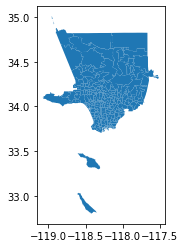

In [51]:
death_zips_map.plot()